# Time Series - Global Means
This notebook computes the global means for different drivers e.g. tos, sos, mld and saves them to netCDF files. This notebook need only be run once but is preserved for reference.


In [20]:
# Importing packages
import xarray as xr
import nc_time_axis
from dask.diagnostics import ProgressBar
from matplotlib.pyplot import figure

import re


In [3]:
# minor helper method - returns the ppname for a particular driver
def pp(driver):
    if driver=='tos' or driver=='sos' or driver=='MLD_003':
        return 'ocean_month'
    elif re.search('intpp*',driver):
        return 'ocean_cobalt_omip_2d'
    elif re.search('os',driver):
        return 'ocean_cobalt_omip_sfc'

In [4]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

In [5]:
# Loading the Control Data and Separating it into TSS, SSS, and MLD files
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/pp/')
ppname = 'ocean_month'
ppname2 = 'ocean_cobalt_omip_2d'
ppname3 = 'ocean_cobalt_omip_sfc'

localdir = '/ts/monthly/5yr/'

In [6]:
ds_pico = xr.open_mfdataset(rootdir+ppname2+localdir+'*intpppico.nc')
ds_diat = xr.open_mfdataset(rootdir+ppname2+localdir+'*intppdiat.nc')
ds_diaz = xr.open_mfdataset(rootdir+ppname2+localdir+'*intppdiaz.nc')
ds_misc = xr.open_mfdataset(rootdir+ppname2+localdir+'*intppmisc.nc')

ds_npp = xr.open_mfdataset(rootdir+ppname2+localdir+'*intpp.nc')



In [13]:
npp_mean = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Global/npp_mean.nc')

In [9]:
ds_total = ds_pico['intpppico'] + ds_diat['intppdiat']+ ds_diaz['intppdiaz'] + ds_misc['intppmisc']

In [17]:
ds_mean = ds_total.weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    ds_mean = ds_mean.compute()

[########################################] | 100% Completed |  1min  9.5s


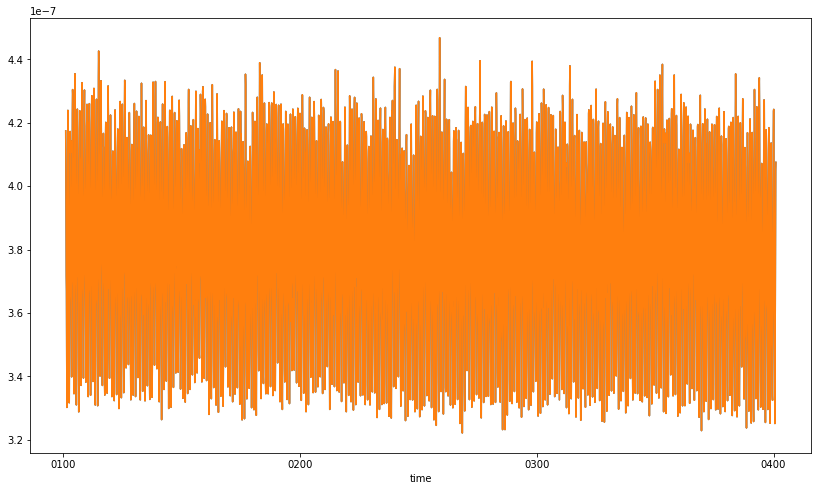

In [21]:
figure(figsize=(14,8))
npp_mean['intpp'].plot(label='intpp')
ds_mean.plot(label='Sum of other npp')

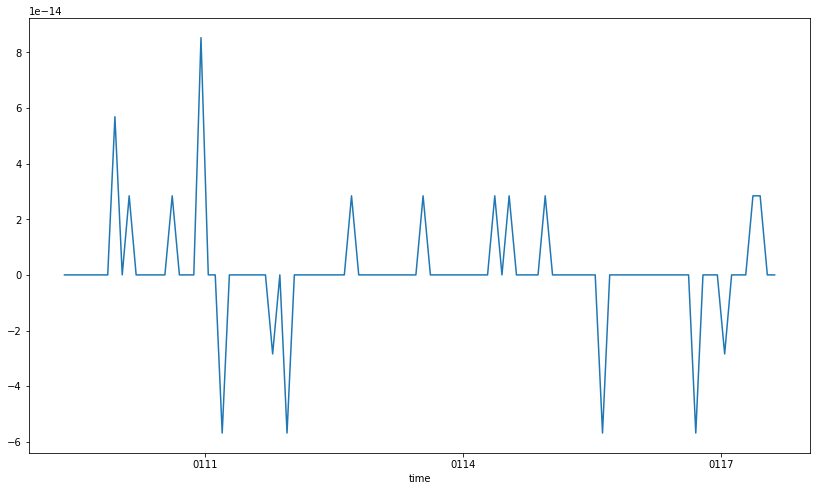

In [25]:
figure(figsize=(14,8))
diff = npp_mean['intpp']-ds_mean
diff.isel(time=slice(100,200)).plot()

In [9]:
# ds_tss = xr.open_mfdataset(rootdir+ppname+localdir+'*tos.nc')
# ds_sss = xr.open_mfdataset(rootdir+ppname+localdir+'*sos.nc')
# ds_mld = xr.open_mfdataset(rootdir+ppname+localdir+'*MLD_003.nc')
# ds_tss.to_netcdf('/home/saumyam/data_netcdf_files/Control_Full/tos')
# ds_sss.to_netcdf('/home/saumyam/data_netcdf_files/Control_Full/sos')
# ds_mld.to_netcdf('/home/saumyam/data_netcdf_files/Control_Full/mld')

In [10]:
ds_tss = xr.open_dataset('/home/saumyam/data_netcdf_files/Control_Full/tos')
ds_sss = xr.open_dataset('/home/saumyam/data_netcdf_files/Control_Full/sos')
ds_mld = xr.open_dataset('/home/saumyam/data_netcdf_files/Control_Full/mld')

In [6]:
# Loading npp data
ds_npp = xr.open_mfdataset(rootdir+ppname2+localdir+'*intpp.nc')

# Loading chlorophyll
ds_chlos = xr.open_mfdataset(rootdir+ppname3+localdir+'*chlos.nc')

In [7]:
ds_chlos.to_netcdf('/home/saumyam/data_netcdf_files/Control_Full/chlos')

/home/saumyam/.local/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(


In [7]:
ds_npp.to_netcdf('/home/saumyam/data_netcdf_files/Control_Full/intpp')

/home/saumyam/.local/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(


In [11]:
def tonetcdf(driver):
    ds = xr.open_mfdataset(rootdir+pp(driver)+localdir+'*'+driver+'.nc')
    ds = ds.chunk({'time':60})
    ds.to_netcdf('/home/saumyam/data_netcdf_files/Control_Full/'+driver)
    ds_mean = ds[driver].weighted(grid['areacello']).mean(['xh','yh'])
    with ProgressBar():
        ds_mean = ds_mean.compute()
    ds_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Global/'+driver+'_mean.nc')
    


In [18]:
tonetcdf('o2os')

/home/saumyam/.local/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(


[########################################] | 100% Completed |  7.0s


In [ ]:
variables = ['po4os','zoocos','no3','phos']

In [ ]:
tos_mean = ds_tss['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    tos_mean = tos_mean.compute()

In [ ]:
tos_mean.plot()

In [ ]:
sos_mean = ds_sss['sos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    sos_mean = sos_mean.compute()

In [ ]:
mld_mean = ds_mld['MLD_003'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    mld_mean = mld_mean.compute()

In [ ]:
tos_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Global/tos_mean.nc')
sos_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Global/sos_mean.nc')
mld_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Global/MLD_003_mean.nc')

In [ ]:
npp_mean = ds_npp['intpp'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    npp_mean = npp_mean.compute()

In [ ]:
npp_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Global/npp_mean.nc')

In [ ]:
chlos_mean = ds_chlos['chlos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    chlos_mean = chlos_mean.compute()

In [ ]:
chlos_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Global/chlos_mean.nc')

In [ ]:
tonetcdf('intpppico',ppname2)
tonetcdf('intppdiat',ppname2)
tonetcdf('intppmisc',ppname2)
tonetcdf('intppdiaz',ppname2)

In [ ]:
BASINS = ['global_land', 'southern_ocean', 'atlantic_ocean', 'pacific_ocean', 'arctic_ocean', 'indian_ocean', 'mediterranean_sea', 'black_sea', 'hudson_bay', 'baltic_sea', 'red_sea']
def basins_netcdf(driver,ppname):
    ds = xr.open_mfdataset(rootdir+ppname+localdir+'*'+driver+'.nc')

    for i in range(9,len(BASINS)):
        ds_basin = ds.where(grid['basin']==i)
        #ds_basin.to_netcdf('/home/saumyam/data_netcdf_files/Control_Basins_Full/'+driver+'_'+BASINS[i]+'_full.nc')
        basin_mean = ds_basin[driver].weighted(grid['areacello']).mean(['xh','yh'])
        print(BASINS[i])
        with ProgressBar():
            basin_mean = basin_mean.compute()
        basin_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Basins_Mean/'+driver+'_'+BASINS[i]+'_mean.nc')
        

In [ ]:
DRIVERS = ['tos','sos','MLD_003','intpp','chlos']
for d in range(len(DRIVERS)):
    basins_netcdf(DRIVERS[d], pp(DRIVERS[d]))

# Regions Datasetting

In [12]:
cond = (grid['geolat']<20) & (grid['geolat']>-20) & (grid['basin']==2)
ds_north = ds_tss.where(cond, drop=True)

In [ ]:
ds_north = ds_north.where(grid['basin']==2)

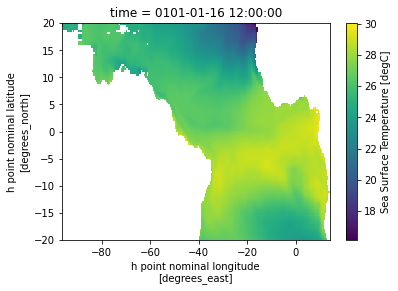

In [17]:
ds_north.isel(time=0)['tos'].plot()

In [8]:
ds_north = ds_tss.where(grid['geolat']>20, drop=True)
ds_south = ds_tss.where(grid['geolat']<-20, drop=True)
    

t_cond = (grid['geolat']<20) & (grid['geolat']>-20)
ds_tropics = ds_tss.where(t_cond, drop=True)



In [ ]:
# split north and south further
ds_20_45_n = ds_north.where(grid['geolat']<45, drop=True)
ds_20_45_s = ds_south.where(grid['geolat']>-45, drop=True)

cond1 = (grid['geolat']>45) & (grid['geolat']<70)
ds_45_70_n = ds_north.where(cond1, drop=True)

cond2 = (grid['geolat']<-45) & (grid['geolat']>-70)
ds_45_70_s = ds_south.where(cond2, drop=True)

ds_70_n = ds_north.where(grid['geolat']>70,drop=True)
ds_70_s = ds_south.where(grid['geolat']<-70,drop=True)

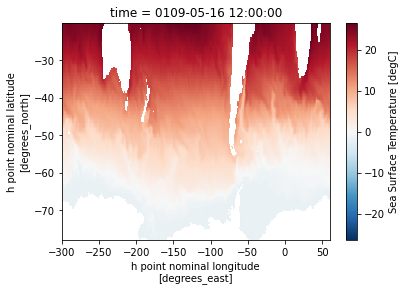

In [9]:
ds_south['tos'].isel(time=100).plot()

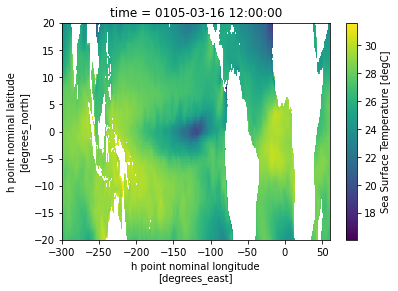

In [10]:
ds_tropics['tos'].isel(time=50).plot()

In [ ]:
ds_20_45_n['tos'].isel(time=0).plot()

In [ ]:
ds_20_45_s['tos'].isel(time=0).plot()

In [ ]:
ds_45_70_n['tos'].isel(time=0).plot()

In [ ]:
ds_45_70_s['tos'].isel(time=0).plot()

In [ ]:
ds_70_n['tos'].isel(time=0).plot()

In [ ]:
ds_70_s['tos'].isel(time=0).plot()

In [ ]:
ds_tss['tos'].isel(time=0).plot()

In [ ]:
ds_tss_2 = ds_tss.where(grid['basin']==0)

In [ ]:
ds_tss_2.isel(time=0)['tos'].plot()

In [ ]:
tos_mean_2 = ds_tss_2['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    tos_mean_2 = tos_mean_2.compute()

In [ ]:
tos_mean_2

In [ ]:
tos_mean_2.plot()

In [ ]:
ds_tss_2 = ds_tss.where(grid['basin']==2)

In [ ]:
tos_mean.plot()

In [18]:
def atl_pac_netcdf(driver):
    ds = xr.open_mfdataset(rootdir+pp(driver)+localdir+'*'+driver+'.nc')
    
    # split into north and south
    ds_north = ds.where(grid['geolat']>20, drop=True)
    ds_south = ds.where(grid['geolat']<-20, drop=True)
    

    t_cond = (grid['geolat']<20) & (grid['geolat']>-20)
    ds_tropics = ds.where(t_cond, drop=True)
    
    lats = [ds_north, ds_south, ds_tropics]
    names = ['north','south','tropics']
    for i in range(len(lats)):
        bas = ['atlantic_ocean','pacific_ocean']
        for j in range(2):
            region = lats[i].where(grid['basin']==(j+2))
            region_mean = region[driver].weighted(grid['areacello']).mean(['xh','yh'])
            with ProgressBar():
                region_mean = region_mean.compute()
            region_mean.to_netcdf('/home/saumyam/data_netcdf_files/Control_Basins_Split/'+driver+'_'+names[i]+'_'+bas[j]+'_mean.nc')
        
        

    
#     # split north and south further
#     ds_20_45_n = ds_north.where(grid['geolat']>20)
#     ds_20_45_n = ds_20_45_n.where(grid['geolat']<45)
    
#     ds_20_45_s = ds_south.where(grid['geolat']<-20)
#     ds_20_45_s = ds_20_45_s.where(grid['geolat']>-45)
    
#     ds_45_70_n = ds_north.where(grid['geolat']>45)
#     ds_45_70_n = ds_45_70_n.where(grid['geolat']<70)
    
#     ds_45_70_s = ds_south.where(grid['geolat']<-45)
#     ds_45_70_s = ds_45_70_s.where(grid['geolat']>-70)
    
#     ds_70_n = ds_north.where(grid['geolat']>70)
#     ds_70_s = ds_south.where(grid['geolat']<-70)

In [19]:
atl_pac_netcdf('tos')

[                                        ] | 0% Completed |  0.1s

/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/pyt

[########################################] | 100% Completed |  5.5s
[########################################] | 100% Completed |  5.7s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s


In [20]:
atl_pac_netcdf('sos')

[                                        ] | 0% Completed |  0.1s

/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/pyt

[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s


In [23]:
atl_pac_netcdf('MLD_003')

[                                        ] | 0% Completed |  0.1s

/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/pyt

[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s


In [21]:
atl_pac_netcdf('intpp')

[                                        ] | 0% Completed |  0.1s

/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/pyt

[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  5.9s


In [22]:
atl_pac_netcdf('chlos')

[                                        ] | 0% Completed |  0.1s

/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/saumyam/.local/lib/pyt

[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.7s
